<a href="https://www.kaggle.com/code/luchales/deep-finance?scriptVersionId=113752856" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
np.random.seed()

In [2]:
x=np.array([[0,1,0],
           [1,0,0],
           [1,1,1],
           [0,1,1]])

y=np.array([[0,1,1,0]]).T

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [4]:
w=2*np.random.random((3,1))-1
b=0

In [5]:
z=x.dot(w)+b

In [6]:
A=sigmoid(z)
print(A)

[[0.70725967]
 [0.31094168]
 [0.3053353 ]
 [0.49342582]]


In [7]:
#Perdida del modelo de medicion
def bce_loss(y,y_hat):
    N=y.shape[0]
    loss=-1/N*np.sum((y*np.log(y_hat))+(1-y)*np.log(1-y_hat))
    return loss

In [8]:
bce_loss(y,A)


1.0657621225511251

In [9]:
N=y.shape[0]
#Gradiantes
dz=(A-y)
dw=1/N*np.dot(x.T,dz)
db=1/N*np.sum(dz,axis=0,keepdims=True)

In [10]:
alpha=1
w -= alpha*dw
b -= alpha*db

In [11]:
epochs=20
loses=[]

In [12]:
for i in range(epochs):
    #Forward pass
    z=x.dot(w)+b
    A=sigmoid(z)
    
    #Calculate loss
    loss=bce_loss(y,A)
    print('Epoch:',i,'Loss:',loss)
    loses.append(loss)
    
    #Calculate derivates
    dz=(A-y)
    dw=1/N*np.dot(x.T,dz)
    db=1/N*np.sum(dz,axis=0,keepdims=True)
    
    #Parameter updates
    w -= alpha*dw
    b -= alpha*db
    

Epoch: 0 Loss: 0.9326997194386005
Epoch: 1 Loss: 0.8238778469700335
Epoch: 2 Loss: 0.7331137612067025
Epoch: 3 Loss: 0.6567021963423227
Epoch: 4 Loss: 0.5920076841130761
Epoch: 5 Loss: 0.5369398078493783
Epoch: 6 Loss: 0.48979341706908325
Epoch: 7 Loss: 0.44917990763755544
Epoch: 8 Loss: 0.4139744981178261
Epoch: 9 Loss: 0.3832683711025553
Epoch: 10 Loss: 0.35632667034127896
Epoch: 11 Loss: 0.332553394821232
Epoch: 12 Loss: 0.31146300040021835
Epoch: 13 Loss: 0.2926578450933476
Epoch: 14 Loss: 0.2758104339305174
Epoch: 15 Loss: 0.26064948397236887
Epoch: 16 Loss: 0.2469489812492603
Epoch: 17 Loss: 0.2345195637495475
Epoch: 18 Loss: 0.22320170882160587
Epoch: 19 Loss: 0.2128603216179836


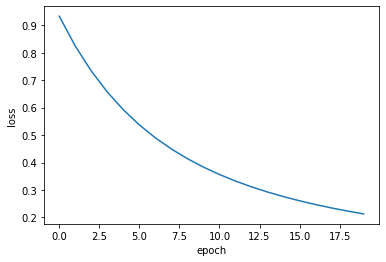

In [13]:
import matplotlib.pyplot as plt
plt.plot(loses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
#A deeper network
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [15]:
def forward_prop(model,a0):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = a0.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)
    cache = {'a0':a0,'z1':z1,'a1':a1,'z1':z1,'a2':a2}
    return cache


In [16]:
def tanh_derivative(x):
    return (1 - np.power(x, 2))

In [17]:
def bce_loss_derivative(y,y_hat):
    return (y_hat-y)

In [18]:
def backward_prop(model,cache,y):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    a0,a1, a2 = cache['a0'],cache['a1'],cache['a2']
    dz2 = bce_loss_derivative(y=y,y_hat=a2)
    dW2 = (a1.T).dot(dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    dz1 = dz2.dot(W2.T) * tanh_derivative(a1)
    dW1 = np.dot(a0.T, dz1)
    db1 = np.sum(dz1, axis=0)
    grads = {'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

In [19]:
#Keras
from keras.layers import Dense, Activation
from keras.models import Sequential
#from tensorflow.keras.layers import Dense,Activation


In [20]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.15)
y = y.reshape(200,1)

In [21]:
model=Sequential()
model.add(Dense(3,input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


2022-12-13 21:29:57.126409: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['acc'])

In [23]:
history = model.fit(X,y,epochs=900)

2022-12-13 21:29:57.341365: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/900
7/7 [==============================] - 1s 2ms/step - loss: 0.8289 - acc: 0.2700
Epoch 2/900
7/7 [==============================] - 0s 2ms/step - loss: 0.8172 - acc: 0.2850
Epoch 3/900
7/7 [==============================] - 0s 2ms/step - loss: 0.8061 - acc: 0.2950
Epoch 4/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7949 - acc: 0.2950
Epoch 5/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7838 - acc: 0.3150
Epoch 6/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7737 - acc: 0.3050
Epoch 7/900
7/7 [==============================] - 0s 1ms/step - loss: 0.7633 - acc: 0.3200
Epoch 8/900
7/7 [==============================] - 0s 2ms/step - loss: 0.7531 - acc: 0.3500
Epoch 9/900
7/7 [==============================] - 0s 1ms/step - loss: 0.7436 - acc: 0.3700
Epoch 10/900
7/7 [==============================] - 0s 1ms/step - loss: 0.7342 - acc: 0.3900
Epoch 11/900
7/7 [==============================] - 0s 1ms/step - loss: 0.7252 